In [11]:
import pandas as pd

In [13]:
text_ana = pd.read_excel('text_analysis_weibo_sample.xlsx',index_col=0)

In [15]:
text_ana

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东
...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京
97,39598,接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...,0,0,0,NaN,0,0,北京


In [17]:
pip install jieba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 9.9 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314458 sha256=938f57a5be1a4e7397b58228afffce4a7619cfc7fab7f6180a22398b589aef0a
  Stored in directory: /Users/lixiayan/Library/Caches/pip/wheels/08/a1/a3/5c8ac52cc2f5782ffffc34c95c57c8e5ecb3063dc69541ee7c
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [19]:
import jieba

In [27]:
def word_segmentation(text):
    words= jieba.lcut(text)
    return ' '. join(words)

In [29]:
text_ana['标题/微博内容']=text_ana['标题/微博内容'].astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/fk/9jmgcs5n4yl9cmhv3wdqb3_m0000gn/T/jieba.cache
Loading model cost 0.850 seconds.
Prefix dict has been built successfully.


0        国债 ： 地产 行业 重磅 利好 提振 风险 偏好 ， 期债 低开 低 走     ...
1                                  # 喜迎 二十大   忠诚 保平安 #
2    注意 ！ 事关 明日 教资 考试 ！ 福建省 教育 考试院 发布 补充 公告     福建省...
3                                          近日 ， “ 千...
4                                            樊振东 牛 逼 ！
Name: 标题/微博内容, dtype: object

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer()

In [35]:
X=vectorizer.fit_transform(text_ana['标题/微博内容'].dropna())

In [37]:
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 5815)


In [39]:
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['00' '000713' '000998' ... '龙头' '龙头企业' '龙湖']


In [75]:
#词频统计
#获取词汇表
feature_words=vectorizer.get_feature_names_out()

#计算词频统计
word_freq=dict(zip(feature_words, X.sum(axis=0).A1))
#zip:对应词语和词频 把words和按行sum的结果拉到一起
# print ('特征词频词典', word_freq)
# word_freq

In [77]:
#观察词袋模型的词频计数结果
# x[1] 取建值对的第二位，reverse=True 从大到小排列 reverse=False 从小到大排列
print ('词袋模型的词频计数', sorted (word_freq.items(),key=lambda x:x[1],reverse=True)[:100])

词袋模型的词频计数 [('万吨', 170), ('市场', 168), ('库存', 103), ('中国', 93), ('预期', 92), ('需求', 88), ('下降', 82), ('电子', 82), ('加息', 75), ('同比', 75), ('上涨', 74), ('价格', 74), ('环比', 74), ('增长', 72), ('亿元', 71), ('经济', 70), ('反弹', 69), ('国内', 69), ('方面', 69), ('继续', 69), ('现货', 68), ('重要', 65), ('企业', 63), ('合约', 62), ('美联储', 62), ('行情', 62), ('政策', 60), ('10', 57), ('出口', 57), ('2022', 56), ('期货', 55), ('关注', 54), ('美元', 54), ('目前', 53), ('发展', 52), ('预计', 52), ('数据', 51), ('11', 49), ('公司', 49), ('交易', 48), ('报告', 48), ('影响', 47), ('2021', 46), ('增加', 46), ('持续', 46), ('策略', 45), ('郑州', 45), ('数字', 44), ('装置', 44), ('产量', 43), ('考生', 43), ('近期', 43), ('美国', 42), ('28', 41), ('减少', 41), ('可能', 41), ('显示', 41), ('原油', 40), ('城市', 40), ('建设', 39), ('来看', 38), ('重庆', 38), ('12', 37), ('主要', 37), ('截至', 37), ('计划', 37), ('资讯', 37), ('国家', 36), ('建议', 36), ('震荡', 36), ('复盘', 35), ('开工率', 35), ('短期', 35), ('下游', 34), ('风险', 34), ('主力', 33), ('成本', 33), ('月份', 33), ('进一步', 33), ('全球', 32), ('开工', 32), ('我们', 

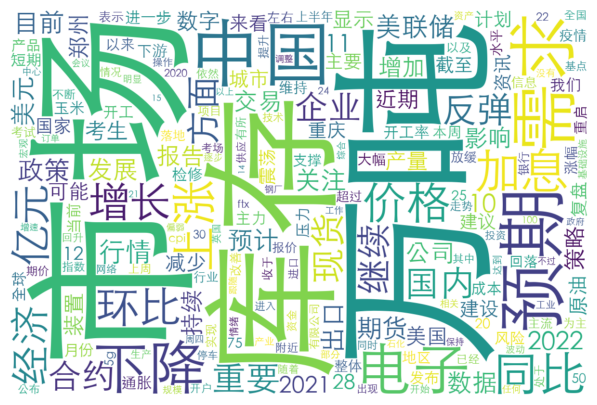

In [79]:
#词云图
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200,height=800
    , max_words=200
    #, max_font_size=100
    , colormap='viridis'
    , background_color='white'
    , font_path='/System/Library/Fonts/STHeiti Light.ttc'
). generate_from_frequencies(word_freq)

#显示词云图
plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
#plt.savefig('wordcloud_twi.png', dpi=100)
plt.show()